In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import pandas as pd
df = pd.read_csv(r"E:\Hackathon\Amex\dataset\train.csv")
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [3]:
# Print summary statistics
df_description = df.describe()
print(df_description)
print("\n")
# Print DataFrame information
df_info = df.info()
print(df_info)
print("\n")

                age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min         

In [4]:
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

In [5]:
# Impute the missing values with mean imputation
df.fillna(df.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
# ... YOUR CODE FOR TASK 4 ...
print(df.isnull().sum())

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children               0
net_yearly_income            0
no_of_days_employed          0
occupation_type              0
total_family_members         0
migrant_worker               0
yearly_debt_payments         0
credit_limit                 0
credit_limit_used(%)         0
credit_score                 0
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


In [6]:

'''for col in list(df.columns):
    # Check if the column is of object type
    if df[col].dtypes == 'object':
        # Impute with the most frequent value
        df = df.fillna(df[col].value_counts().index[1])'''
df = df.fillna("N")
df.isnull().sum()

customer_id                0
name                       0
age                        0
gender                     0
owns_car                   0
owns_house                 0
no_of_children             0
net_yearly_income          0
no_of_days_employed        0
occupation_type            0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
credit_card_default        0
dtype: int64

In [7]:
one_hot = pd.get_dummies(df['occupation_type'])
df = df.drop('occupation_type',axis = 1)
df = df.join(one_hot)
df

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,...,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
0,CST_115179,ita Bose,46,F,N,Y,0.000000,107934.04,612.0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,CST_121920,Alper Jonathan,29,M,N,Y,0.000000,109862.62,2771.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.000000,230153.17,204.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.000000,122325.82,11941.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.000000,387286.00,1459.0,1.0,...,0,0,0,0,0,0,0,0,0,0
5,CST_123268,Sarah Marsh,46,F,Y,N,0.000000,252765.91,2898.0,2.0,...,0,0,0,0,0,0,0,0,0,0
6,CST_127502,Mason,38,M,N,Y,1.000000,262389.20,5541.0,3.0,...,0,0,0,0,0,0,0,0,0,0
7,CST_151722,Saba,46,F,Y,Y,1.000000,241211.39,1448.0,3.0,...,0,0,0,0,0,0,0,0,0,0
8,CST_133768,Ashutosh,40,F,N,Y,0.000000,210091.43,11551.0,2.0,...,0,0,0,0,0,0,0,0,0,0
9,CST_111670,David Milliken,39,F,Y,Y,2.000000,207109.13,2791.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)
df

,customer_id,name,age,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,...,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff,F,M,XNA
0,CST_115179,ita Bose,46,N,Y,0.000000,107934.04,612.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,CST_121920,Alper Jonathan,29,N,Y,0.000000,109862.62,2771.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,CST_109330,Umesh Desai,37,N,Y,0.000000,230153.17,204.0,2.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,CST_128288,Rie,39,N,Y,0.000000,122325.82,11941.0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,CST_151355,McCool,46,Y,Y,0.000000,387286.00,1459.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,CST_123268,Sarah Marsh,46,Y,N,0.000000,252765.91,2898.0,2.0,1.0,...,0,0,0,0,0,0,0,1,0,0
6,CST_127502,Mason,38,N,Y,1.000000,262389.20,5541.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,0
7,CST_151722,Saba,46,Y,Y,1.000000,241211.39,1448.0,3.0,0.0,...,0,0,0,0,0,0,0,1,0,0
8,CST_133768,Ashutosh,40,N,Y,0.000000,210091.43,11551.0,2.0,0.0,...,0,0,0,0,0,0,0,1,0,0
9,CST_111670,David Milliken,39,Y,Y,2.000000,207109.13,2791.0,4.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
p = df.columns[16:]
p

Index(['credit_card_default', 'Accountants', 'Cleaning staff', 'Cooking staff',
       'Core staff', 'Drivers', 'HR staff', 'High skill tech staff',
       'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers',
       'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Unknown',
       'Waiters/barmen staff', 'F', 'M', 'XNA'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
      if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])
       

In [11]:
df['owns_car'].value_counts()

0    30290
1    15238
Name: owns_car, dtype: int64

In [12]:
df = df.drop(["name","customer_id"],axis=1)

In [13]:
X = df.drop('credit_card_default',axis=1)
y = df.iloc[:,14:15]

In [14]:
y

,credit_card_default
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [15]:
print(X.shape)
print(y.shape)

(45528, 36)
(45528, 1)


In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)
X, y = over.fit_resample(X,y)
under = RandomUnderSampler(sampling_strategy=0.5)
X, y = under.fit_resample(X,y)

In [17]:
from sklearn.preprocessing import StandardScaler
t = StandardScaler()
X_transform = t.fit_transform(X)

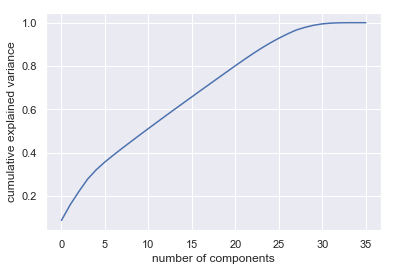

In [18]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_transform,y)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [19]:
pca_1 = PCA(n_components = 30)
X_pca_t = pca_1.fit_transform(X_transform)
print('Explained variation per principal component: {}'.format(pca_1.explained_variance_ratio_))

Explained variation per principal component: [0.08681747 0.07186695 0.061282   0.05714216 0.04358052 0.0360378
 0.03240589 0.03135271 0.03043741 0.03028152 0.02992945 0.02962405
 0.02960763 0.02919287 0.02913315 0.02897296 0.02890312 0.02875536
 0.02872595 0.02871218 0.02861151 0.02784086 0.0271784  0.02600148
 0.02400767 0.02193591 0.01988123 0.01808738 0.01212396 0.00982546]


In [20]:
df_test = pd.read_csv(r"E:\Hackathon\Amex\dataset\test.csv")
df_test.fillna(df_test.mean(), inplace=True)
'''for col in list(df_test.columns):
    # Check if the column is of object type
    if df_test[col].dtypes == 'object':
        # Impute with the most frequent value
        df_test = df_test.fillna(df_test[col].value_counts().index[1])'''
df_test = df_test.fillna("N")



In [21]:
df_test = df_test.drop(["name","customer_id"],axis=1)

In [22]:
one_hot_test = pd.get_dummies(df_test['occupation_type'])
df_test = df_test.drop('occupation_type',axis = 1)
df_test = df_test.join(one_hot_test)
df_test.shape

(11383, 34)

In [23]:
one_hot_test = pd.get_dummies(df_test['gender'])
df_test = df_test.drop('gender',axis = 1)
df_test = df_test.join(one_hot_test)
df_test.shape

(11383, 36)

In [24]:
q = df_test.columns[13:]
q

Index(['default_in_last_6months', 'Accountants', 'Cleaning staff',
       'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Unknown',
       'Waiters/barmen staff', 'F', 'M', 'XNA'],
      dtype='object')

In [25]:
for col in df_test.columns:
    # Compare if the dtype is object
    if df_test[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        df_test[col]=le.fit_transform(df_test[col])

In [26]:
df_test['owns_car'].value_counts()

0    7504
1    3879
Name: owns_car, dtype: int64

In [27]:
'''param_xgboost = {
'max_depth':range(3,7,2),
  'gamma':[i/10.0 for i in range(0,4)],
    'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

grid_xg = GridSearchCV(estimator = model,param_grid = param_xgboost,cv = 5)
grid_model_result_xg = grid_xg.fit(X_pca_t, y)
best_score, best_params = grid_model_result_xg.best_score_,grid_model_result_xg.best_params_
print("Best: %f using %s" % (best_score, best_params))'''

'param_xgboost = {\n\'max_depth\':range(3,7,2),\n  \'gamma\':[i/10.0 for i in range(0,4)],\n    \'reg_alpha\':[1e-5, 1e-2, 0.1, 1, 100]\n}\n\ngrid_xg = GridSearchCV(estimator = model,param_grid = param_xgboost,cv = 5)\ngrid_model_result_xg = grid_xg.fit(X_pca_t, y)\nbest_score, best_params = grid_model_result_xg.best_score_,grid_model_result_xg.best_params_\nprint("Best: %f using %s" % (best_score, best_params))'

In [28]:
'''#Best: 0.980012 using {'gamma': 0.0, 'max_depth': 9, 'reg_alpha': 100}
#Best2 :     using {'gamma': 0.2, 'max_depth':5, 'reg_alpha' : 100}
#Best3 : using {'gamma':0.3,'max_depth':6,'reg_alpha':100}
#Best4 : using {'gamma':0.3,'max_depth':6,'reg_alpha':100,'eta':0.325}
y_test_pred_3 = grid_xg.predict(df_test_pca)'''

"#Best: 0.980012 using {'gamma': 0.0, 'max_depth': 9, 'reg_alpha': 100}\n#Best2 :     using {'gamma': 0.2, 'max_depth':5, 'reg_alpha' : 100}\n#Best3 : using {'gamma':0.3,'max_depth':6,'reg_alpha':100}\n#Best4 : using {'gamma':0.3,'max_depth':6,'reg_alpha':100,'eta':0.325}\ny_test_pred_3 = grid_xg.predict(df_test_pca)"

In [29]:
import xgboost as xgb
model_test = xgb.XGBClassifier(max_depth = 6, reg_alpha = 100, gamma = 0.05,eta = 0.05)
model_test.fit(X_pca_t, y)
df_test_transform = t.transform(df_test)
df_test_pca = pca_1.transform(df_test_transform)
y_test_pred_3 = model_test.predict(df_test_pca)

C:\Users\HP\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:03:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
df_2 = pd.read_csv(r"E:\Hackathon\Amex\dataset\test.csv")
df_2 = df_2.iloc[:,0:1]
df_2.insert(1,"credit_card_default",y_test_pred_3,True)
df_2

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1
5,CST_107341,0
6,CST_147879,0
7,CST_156027,0
8,CST_109067,0
9,CST_114556,0


In [32]:
df_2.to_csv(r"E:\Hackathon\Amex\dataset\Test_84.csv",index=False)